In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pageName = 'AllTests'
saveGraphs = True

savePath = 'images/graphs/'+pageName
df = pd.read_excel (r'data/latency/latency_nuvolaPunti.xlsx', sheet_name=pageName)

delayTicks = [300, 500, 750, 1000, 1500, 2000] 
delayPoints = df['delay'].to_numpy()
latencyPoints = df['latency'].to_numpy()
marginErrPoints = df['marginErr'].to_numpy()
maxPoints = df['max'].to_numpy()
minPoints = df['min'].to_numpy()

plt.style.use('seaborn-whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}    
sns.set_context("paper", rc = paper_rc)  
sns.set(style="ticks", palette="muted")

#fig, ax = plt.subplots()

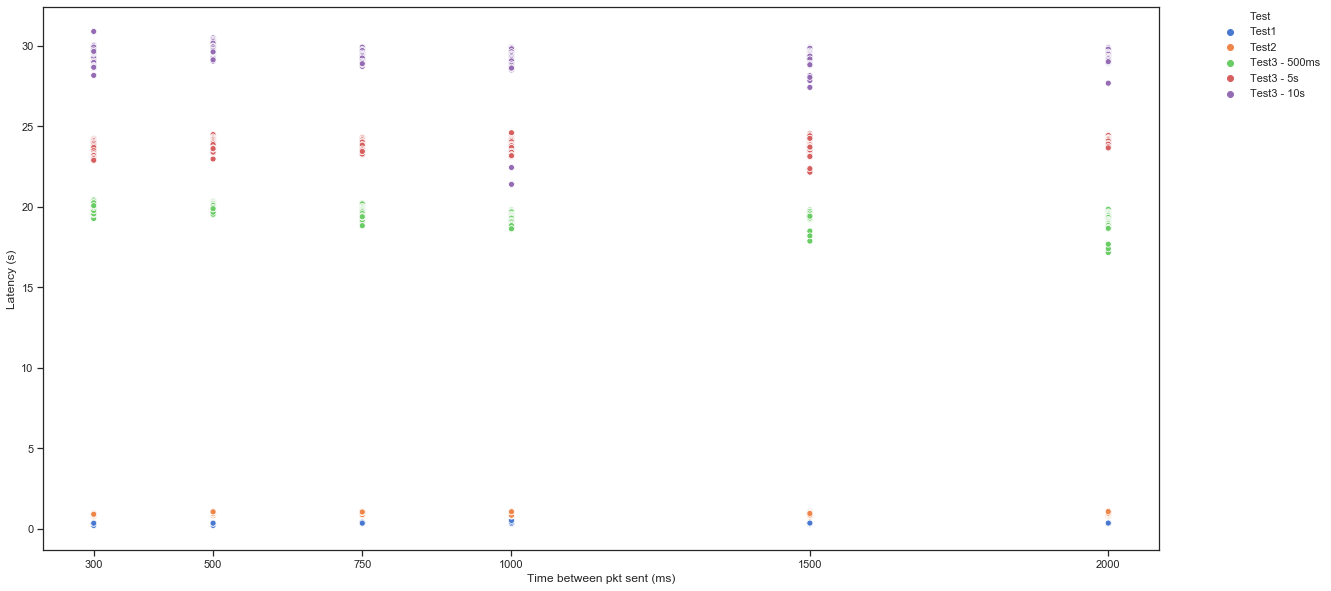

In [3]:
if pageName in ["AllTests", "AllTest3"]:
    plt.figure(figsize=(20,10))
    #df.plot.scatter('delay', 'latency', color='red', s=0.5)
    sns.scatterplot(x="delay", y="latency", hue="Test", palette="muted",data=df)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    if saveGraphs == True:
        plt.savefig(savePath+' scatterPlot.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)
else:
    plt.figure(figsize=(20,10))
    #df.plot.scatter('delay', 'latency', color='red', s=0.5)
    sns.scatterplot(x="delay", y="latency",data=df)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    if saveGraphs == True:
        plt.savefig(savePath+' scatterPlot.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)

In [4]:
if pageName not in ["AllTests", "AllTest3"]:
    #Scatter plot with error bar
    plt.figure(figsize=(20,10))
    plt.errorbar(delayPoints, latencyPoints,  yerr=marginErrPoints, markersize=3, fmt='o', color ='red', ecolor='black', capsize=2, barsabove = False, alpha =0.1)
    plt.title("Scatter plot with error bars - "+pageName)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")

    if saveGraphs == True:
        plt.savefig(savePath+' dispersion.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)
    

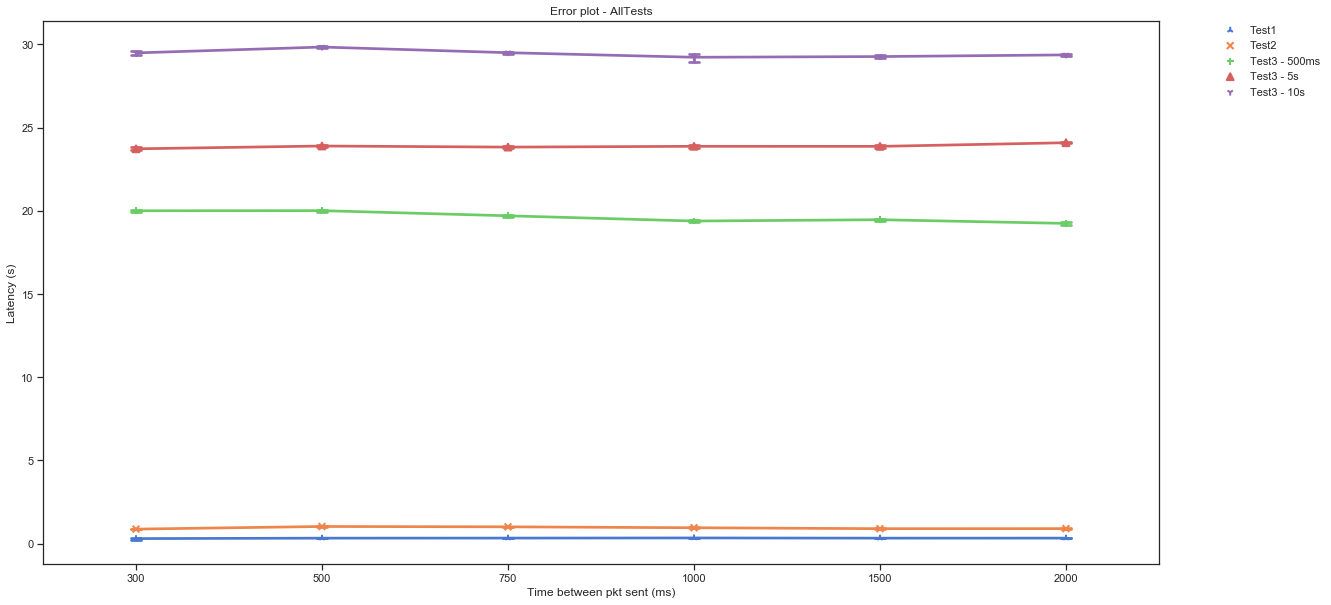

In [5]:
if pageName in ["AllTests", "AllTest3"]:
    #Error interval mean plot
    plt.figure(figsize=(20,10))
    sns.pointplot('delay', 'latency', hue='Test', markers=["2", "x", "+", "^","1"], data=df, capsize=.05, yerr= marginErrPoints, height=5, aspect = 2, err_style="bars", ci=95)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Error plot - "+pageName)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    if saveGraphs == True:
        plt.savefig(savePath+' linePlotWithErrorBar.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)
else:
    #Error plot
    plt.figure(figsize=(20,10))
    sns.pointplot('delay', 'latency', data=df, capsize=.05, yerr= marginErrPoints,  err_style="bars", ci=95)
    plt.title("Error plot - "+pageName)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    if saveGraphs == True:
        plt.savefig(savePath+' linePlotWithErrorBar.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)

C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

<Figure size 1440x720 with 0 Axes>

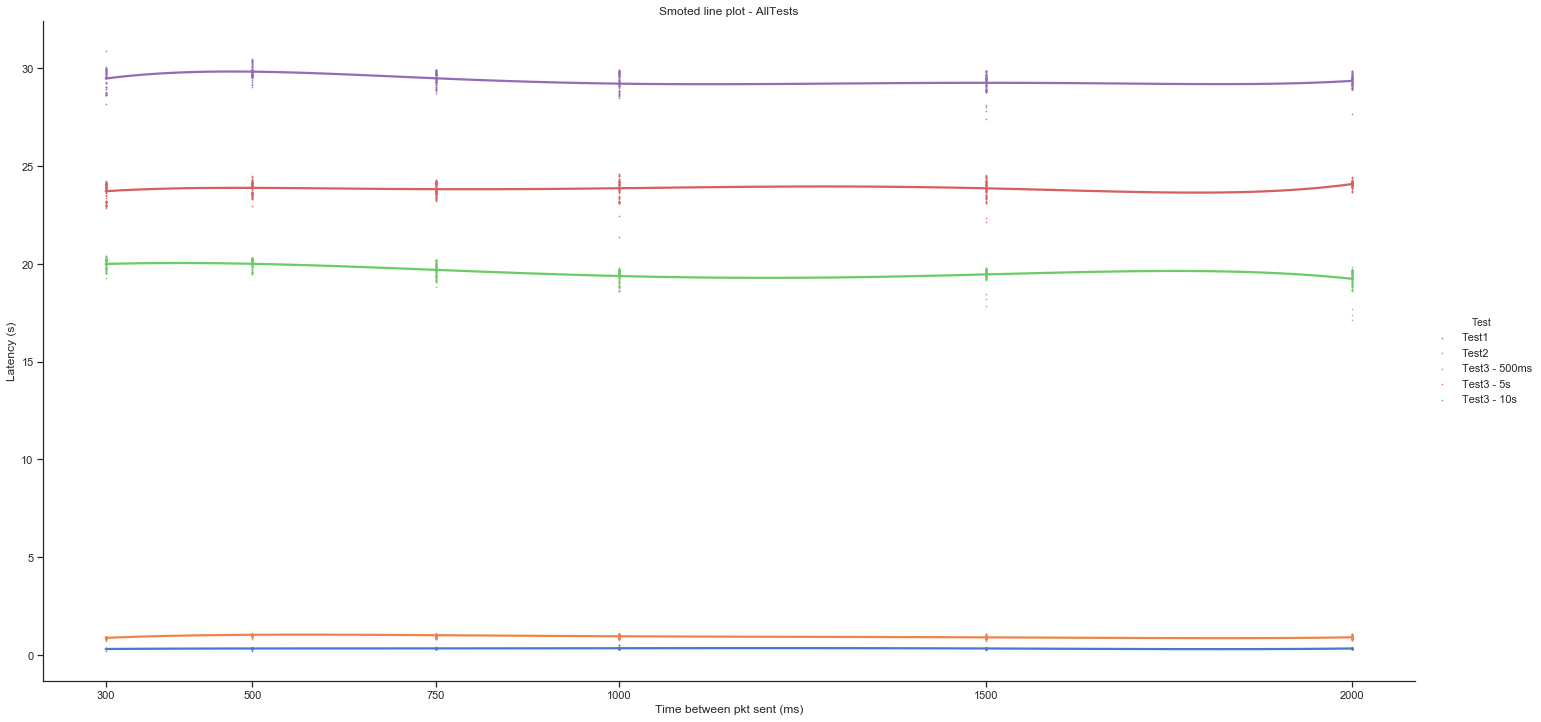

<Figure size 1440x720 with 0 Axes>

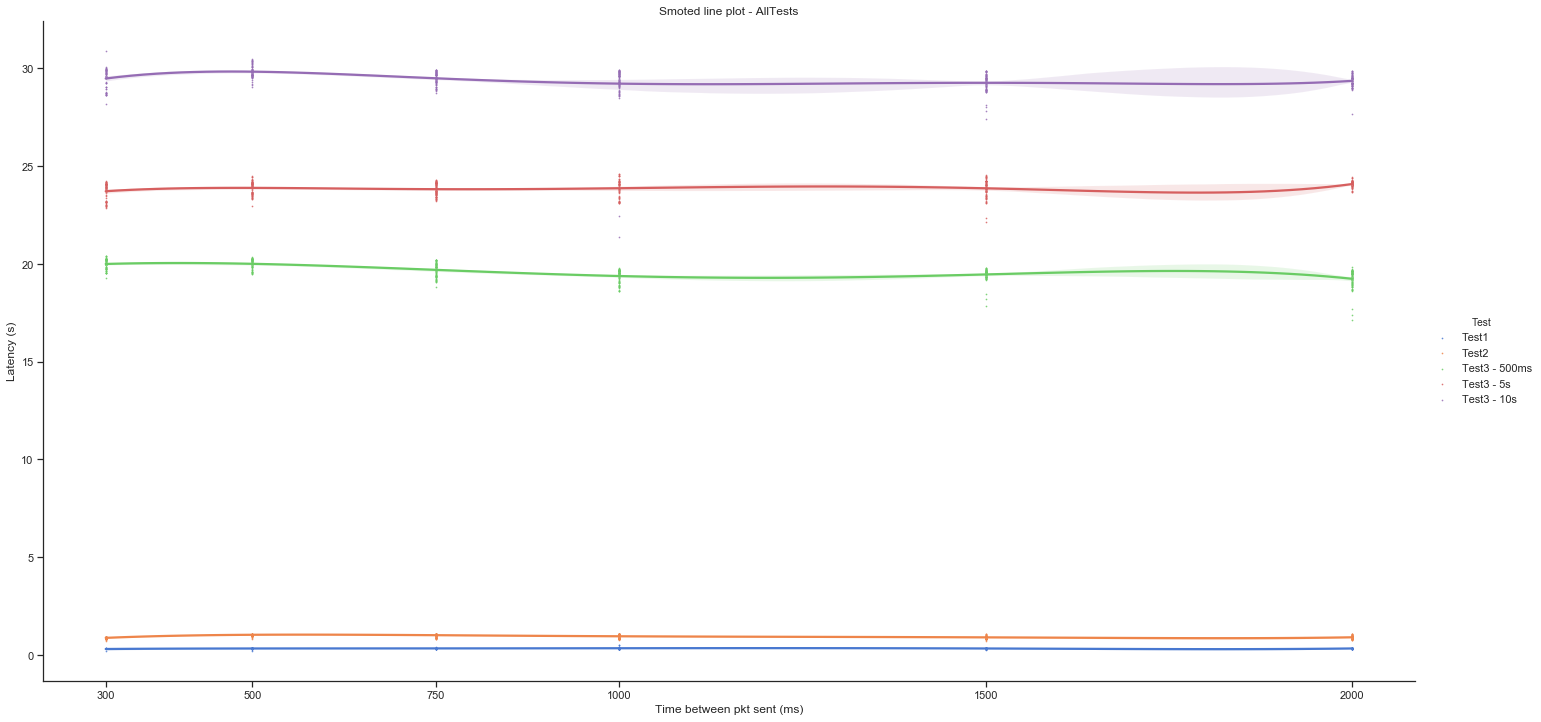

In [6]:
if pageName in ["AllTests", "AllTest3"]:
    #Smote plot
    plt.figure(figsize=(20,10))
    sns.lmplot('delay', 'latency', hue ='Test',data=df,  ci=None, order=5,height=10, aspect = 2, truncate=True, scatter_kws={"s": 0.5})
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Smoted line plot - "+pageName)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    
    if saveGraphs == True:
        plt.savefig(savePath+' smoteInterpolation.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)
        
    plt.figure(figsize=(20,10))
    sns.lmplot('delay', 'latency', hue ='Test',data=df,  ci=95, order=5,height=10, aspect = 2, truncate=True, scatter_kws={"s": 0.5})
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Smoted line plot - "+pageName)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    
    if saveGraphs == True:
        plt.savefig(savePath+' smoteInterpolationWithCI.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.2)
else:
    #Smote plot
    plt.figure(figsize=(20,10))
    g = sns.lmplot('delay', 'latency',data=df,  ci=95, order=5, height=10, aspect = 2, truncate=True, legend_out=True, scatter_kws={"s": 5})
    plt.title("Smoted line plot with CI - "+pageName)
    plt.xticks(delayTicks)
    
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    
    if pageName == "Test1":
        g.set(ylim=(0.25, 0.41))
    if pageName == "Test2":
        g.set(ylim=(0.7, 1.1))
    if pageName == "Test3 500ms":
        g.set(ylim=(17, 20.5))
    if pageName == "Test3 5sec":
        g.set(ylim=(22, 25))
    if pageName == "Test3 10sec":
         g.set(ylim=(21, 31))
    if saveGraphs == True:
        plt.savefig(savePath+' smoteinterpolationWithCI.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.2, transparent=False)
    
    plt.figure(figsize=(20,10))
    g = sns.lmplot('delay', 'latency',data=df,  ci=None, order=5, height=10, aspect = 2, truncate=True, legend_out=True, scatter_kws={"s": 5})
    plt.title("Smoted line plot - "+pageName)
    plt.xticks(delayTicks)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    
    if pageName == "Test1":
        g.set(ylim=(0.25, 0.41))
    if pageName == "Test2":
        g.set(ylim=(0.7, 1.1))
    if pageName == "Test3 500ms":
        g.set(ylim=(17, 20.5))
    if pageName == "Test3 5sec":
        g.set(ylim=(22, 25))
    if pageName == "Test3 10sec":
         g.set(ylim=(21, 31))
    if saveGraphs == True:
        plt.savefig(savePath+' smoteinterpolation.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.2)

C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\massi\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

<Figure size 1440x720 with 0 Axes>

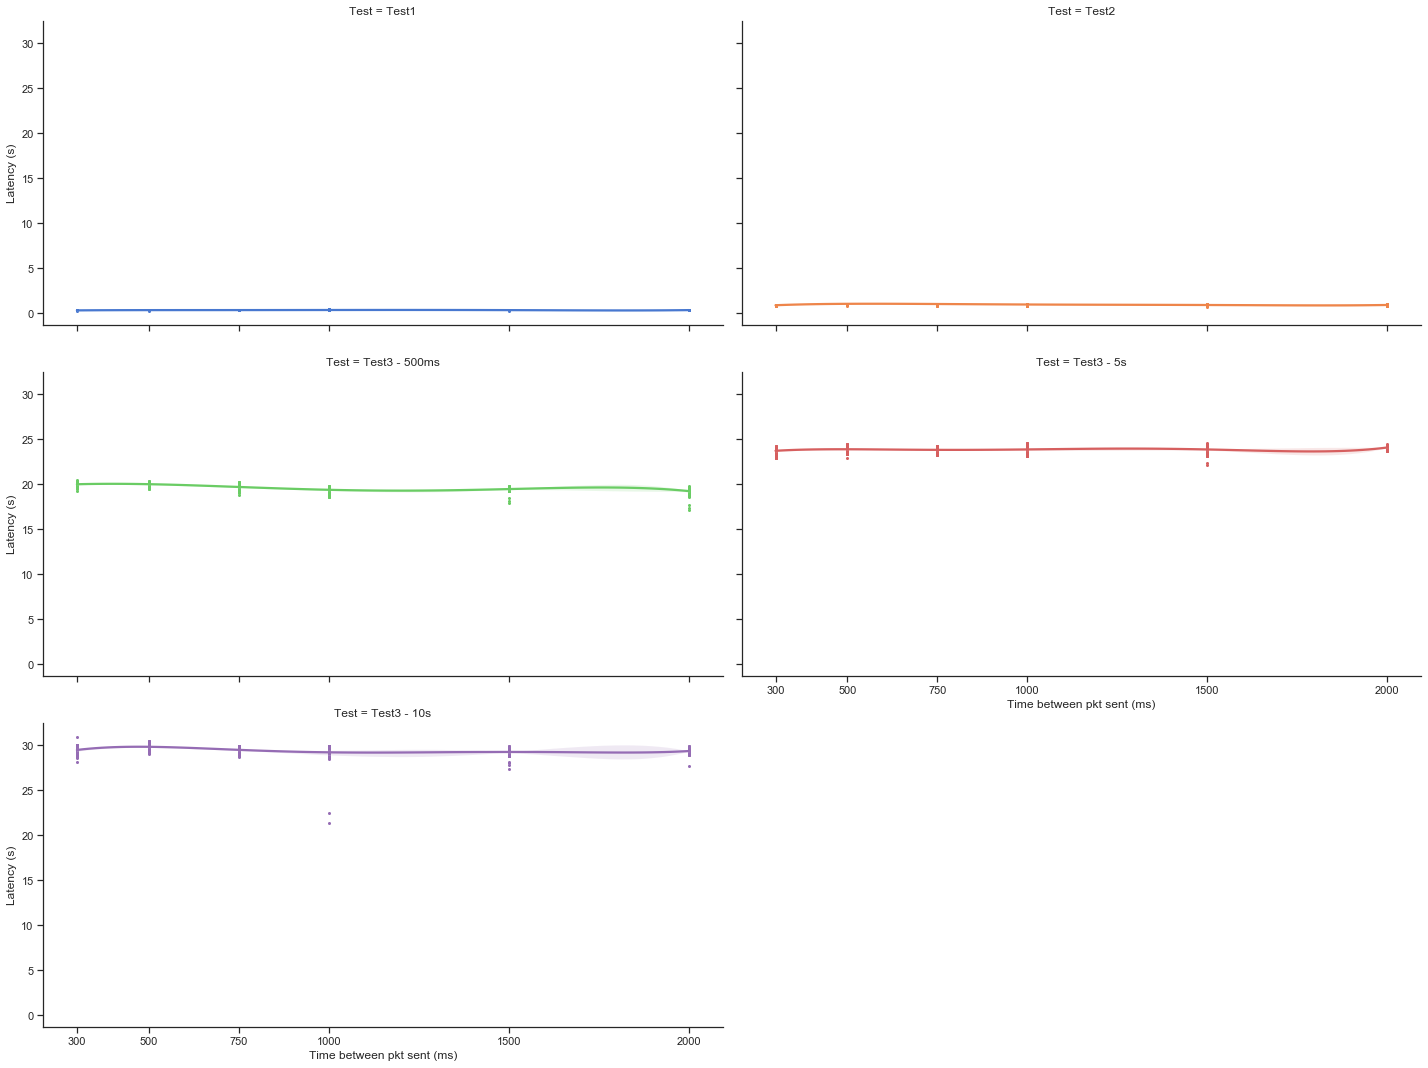

<Figure size 1440x720 with 0 Axes>

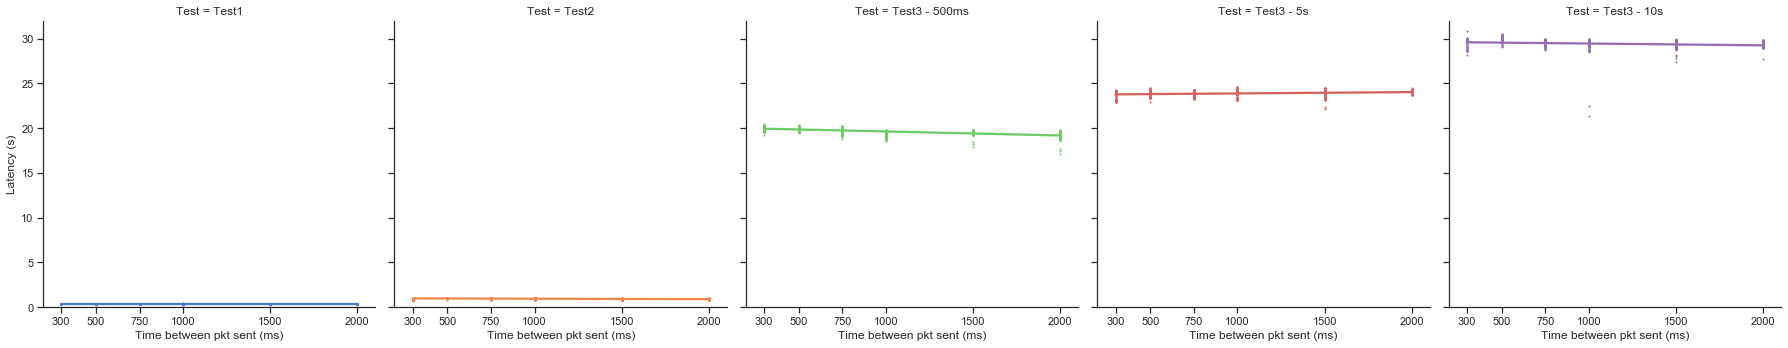

In [7]:
if pageName in ["AllTests", "AllTest3"]:
    #Smote plot - confronto
    plt.figure(figsize=(20,10))
    g = sns.lmplot(x="delay", y="latency", col="Test", hue="Test", data=df,
           col_wrap=2, ci=95, palette="muted", height=5, aspect = 2, order=5, truncate = True,
           scatter_kws={"s": 4, "alpha": 1})
    g = (g.set_axis_labels("Time between pkt sent (ms)", "Latency (s)"))
    plt.xticks(delayTicks)
    
    if saveGraphs == True:
        plt.savefig(savePath+' confrontoSmootedLine.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)
    
    plt.figure(figsize=(20,10))
    g = sns.lmplot('delay', 'latency', col="Test", hue="Test", data=df, scatter_kws={"s": 1, "alpha": 1},
               palette="muted", y_jitter=.02, logistic=False, truncate=True)
    g = (g.set_axis_labels("Time between pkt sent (ms)", "Latency (s)"))
    
    g.set(ylim=(0, 32))
    plt.xticks(delayTicks)
    
    if saveGraphs == True:
        plt.savefig(savePath+' confrontoRegressionLine.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2)

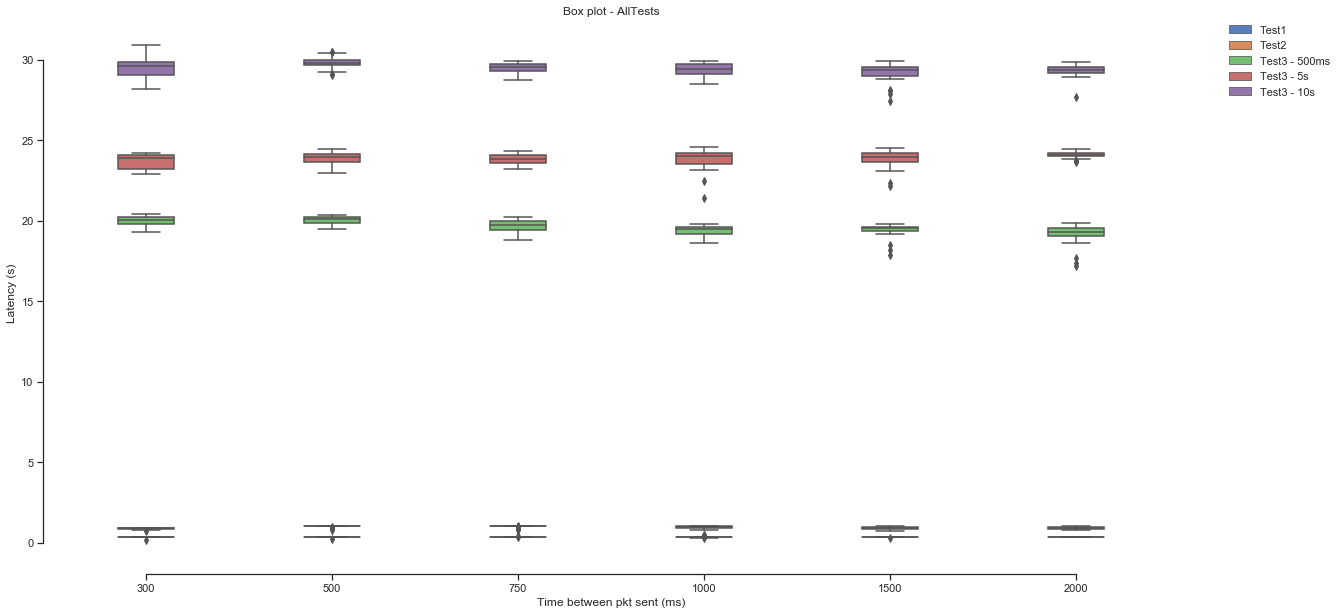

In [8]:
if pageName in ["AllTests", "AllTest3"]:
    plt.figure(figsize=(20,10))
    sns.boxplot('delay', 'latency', palette="muted", data=df, hue="Test",width=0.3, dodge = False) #notch = True
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Box plot - "+pageName)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    sns.despine(offset=10, trim=True)
    if saveGraphs == True:
        plt.savefig(savePath+' boxPlot.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2) 
else:
    plt.figure(figsize=(20,10))
    sns.boxplot('delay', 'latency', palette="muted", data=df,width=0.3, dodge = False)
    #sns.swarmplot('delay', 'latency', data=df, color=".25")
    plt.title("Box plot - "+pageName)
    plt.xlabel("Time between pkt sent (ms)")
    plt.ylabel("Latency (s)")
    sns.despine(offset=10, trim=True)


    if saveGraphs == True:
        plt.savefig(savePath+' boxPlot.png', format='png', dpi=300,  bbox_inches='tight', pad_inches=0.2) 

In [9]:
#sns.residplot('delay', 'latency',data=df, lowess=True, color="g")
#sns.jointplot('delay', 'latency',data=df, kind="hex", color="#4CB391")   
#sns.regplot('delay', 'latency',ci=95, data=df)